<img src = "images/logos.png" align = "center">
<br>
<h1 align=center><font size = 5>Régression linéaire et commentaires yelp</font></h1>

## Introduction

Ce mini projet se base su un extrait de données de la compétition Kaggle [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013).

**Description of the data:**

- `yelp.json` est le format original des données. `yelp.csv` contient les mêmes données dans un format plus pratique. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Chaque observation de ce jeu de données est un commentaire fait sur une entreprise particulière par un utilisateur.
- La colonne "étoiles" correspond au nombre d'étoiles (1 à 5) attribuées par l'évaluateur à l'entreprise. 
- La colonne "cool" correspond au nombre de votes "cool" que cet avis a reçus par d'autres utilisateurs de Yelp. Tous les avis commencent par 0 vote «cool», et il n'y a pas de limite au nombre de votes «cool» qu'un avis peut recevoir. (Il s'agit donc d'une évaluation de l'avis lui-même, et non d'une évaluation de l'entreprise).
- Les colonnes "utile" et "drôle" sont similaires à la colonne "cool".

## Objectif 1

Charger `yelp.csv` dans un DataFrame.

In [30]:
import pandas as pd
yelp = pd.read_csv('data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


### Objectif 1 (Bonus)

Essayer de charger les données depuis le fichier json. Attention au traitement de la colonne 'votes'.<br>
Lecture e encodage du fichier en Python. Conversion en DataFrame et ajout des colonnes pour chaque type de vote..

In [31]:
# Lecture du fichier et import des données dans une liste de dictionnaires
# Chaque ligne est traitée en utilisant json.loads()
import json
with open('data/yelp.json', 'r') as f:
    data = [json.loads(row) for row in f]
    
#Par read_json
yelp2=pd.read_json('data/yelp.json', lines=True)
yelp2.head(1)

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg


In [32]:
# Visualisation de la 1ère ligne
data[0]

{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'date': '2011-01-26',
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It wa

In [50]:
# conversion de la liste en DataFrame
yelp = pd.DataFrame(data)
yelp.head(1)

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg


In [51]:
# ajout des colonnes cool, useful, and funny
yelp['cool'] = [row['votes']['cool'] for row in data]
yelp['useful'] = [row['votes']['useful'] for row in data]
yelp['funny'] = [row['votes']['funny'] for row in data]

In [52]:
# Suppression de la colonne 'votes'
#yelp.drop('votes', axis=1, inplace=True)
yelp.head(1)

,votes,user_id,review_id,stars,date,text,type,business_id,cool,useful,funny
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,2,5,0


## Objectif 2

Examiner la relation entre chaque type de vote (cool/useful/funny) et le nombre d'étoiles.

In [54]:
# Matrice de correlation
yelp.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


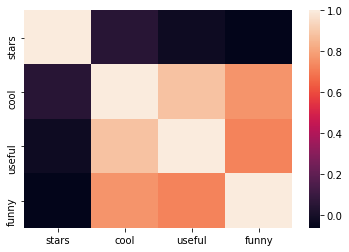

In [56]:
# Heatmap
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

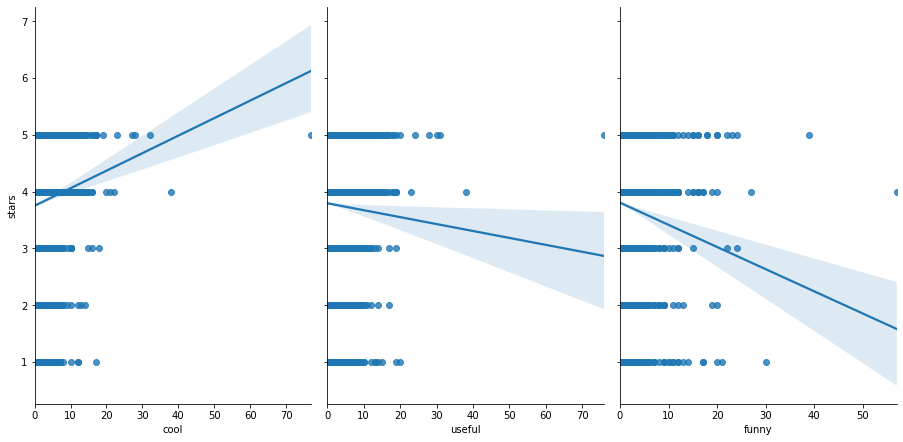

In [65]:
# Nuages de points
sns.pairplot(yelp, x_vars=["cool", 'useful', 'funny'], y_vars='stars', height=6, aspect=0.7, kind='reg')

## Objectif 3

Définir les colonnes cool/useful/funny comme caratéristiques et le nombre d'étoiles comme cible.

In [57]:
caract = ['cool', 'useful', 'funny']
X = yelp[caract]
y = yelp.stars

Appliquer un modèle de regression linéaire aux données et afficher les coefficients obtenus.<br> Pouvez vous en donner une interpretation ?

In [58]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
for line in zip(caract, linreg.coef_):
    print(line)

('cool', 0.27435946858853094)
('useful', -0.14745239099401478)
('funny', -0.1356744905370615)


In [59]:
print(linreg.score(X,y))

0.0442728562420025


## Objectif 5

Evaluer le modèle avec train_test split et RMSE.

In [60]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [67]:
# definir une fonction qui prends en argument un tableau de cacarteristiques et qui retourne la RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=yelp['stars'])
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [68]:
# calculer la RMSE avec les 3 caractéristiques
train_test_rmse(['cool', 'useful', 'funny'])

1.1883394457888015

## Objectif 6

Modifier la liste des caractéristiques pour rechercher un meilleur modèle.

In [69]:
print(train_test_rmse(['cool', 'useful']))
print(train_test_rmse(['cool', 'funny']))
print(train_test_rmse(['useful', 'funny']))

1.2000921631987491
1.1967842926092733
1.2108683188041474


## Objectif 7

Exploiter les autre caractéristiques en extrayant des informations du texte et tester le modèle à la recherche d'une amélioration de la RMSE.

In [70]:
# Nouvelle caractéristique : longueur de texte du commentaire
yelp['longueur'] = yelp.text.apply(len)

In [71]:
# Nouvelle caractéristique : le texte contient les mots 'love' ou 'hate'
yelp['love'] = yelp.text.str.contains('love', case=False).astype(int)
yelp['hate'] = yelp.text.str.contains('hate', case=False).astype(int)

In [72]:
# ajouter les nouvelles caractéristiques au modèle et calculer la RMSE
train_test_rmse(['cool', 'useful', 'funny', 'longueur', 'love', 'hate'])

1.1593576998314103

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND